## THIS STUDIES DATA BEFORE CAMP_A_18 DAY 587

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from sklearn.cluster import KMeans

sns.set(color_codes = True)

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

In [2]:
dir_path = '~/Documents/DATA_SCIENCE/Kroger_Retail_Dunnhumby/The-Complete-Journey/data/'

file1= dir_path + 'transaction_data.csv'
file2 = dir_path + 'hh_demographic.csv'
file3 = dir_path + 'coupon_redempt.csv'
file4= dir_path + 'coupon.csv'
file5 = dir_path + 'campaign_desc.csv'
file6 = dir_path + 'campaign_table.csv'
file7= dir_path + 'causal_data.csv'
file8 = dir_path + 'product.csv'


In [3]:
def load_data(filename):
    df = pd.read_csv(filename)
    df.columns = df.columns.str.lower()
    return df
    

In [4]:
# import data listings into dataframe
df_trans_full = load_data(file1)
df_trans_full.head()


,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [5]:
df_coupon_redempt_full = load_data(file3)
df_coupon_redempt_full.head()

,household_key,day,coupon_upc,campaign
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [6]:
df_coupon_full = load_data(file4)
df_coupon_full.head()


,coupon_upc,product_id,campaign
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [7]:
df_camp_des = load_data(file5)
df_camp_des.head()

,description,campaign,start_day,end_day
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [13]:
df_camp_cus_full = load_data(file6)
df_camp_cus_full.head()

,description,household_key,campaign
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [10]:
# df_prod_causal = load_data(file7)
# df_prod_causal.head()

,product_id,store_id,week_no,display,mailer
0,26190,286,70,0,A
1,26190,288,70,0,A
2,26190,289,70,0,A
3,26190,292,70,0,A
4,26190,293,70,0,A


In [8]:
df_prod = load_data(file8)
df_prod.head()

,product_id,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [9]:
print('Total trans', df_trans_full.shape)
df_trans = df_trans_full[df_trans_full.day<587]
print('Total trans before day 587', df_trans.shape)

Total trans (2595732, 12)
Total trans before day 587 (2077756, 12)


In [10]:
print('Total redemption', df_coupon_redempt_full.shape)
df_coupon_redempt = df_coupon_redempt_full.query('campaign<18 or campaign>25')
print('Total redemption before day 587', df_coupon_redempt.shape)

Total redemption (2318, 4)
Total redemption before day 587 (1420, 4)


In [11]:
print('Total coupons', df_coupon_full.shape)
df_coupon = df_coupon_full.query('campaign<18 or campaign>25')
print('Total coupons before day 587', df_coupon.shape)

Total coupons (124548, 3)
Total coupons before day 587 (78221, 3)


In [14]:
print('Total camps cus records', df_camp_cus_full.shape)
df_camp_cus = df_camp_cus_full.query('campaign<18 or campaign>25')
print('Total camps cus records before day 587', df_camp_cus.shape)

Total camps cus records (7208, 3)
Total camps cus records before day 587 (4890, 3)


In [15]:
# df_household_demo = pd.read_csv('retail_data2/households_demo.csv')

df_household_demo = pd.read_csv('retail_data2/households_demo.csv')
df_campaign_detail = pd.read_csv('DATA_CLEAN/campaign_details.csv')




In [433]:
df_campaign_detail

,description,campaign,start_day,end_day,total_coupons,coupons_giveout
0,TypeA,26,224,264,181.0,16.0
1,TypeC,27,237,300,27.0,27.0
2,TypeB,28,259,320,28.0,28.0
3,TypeB,29,281,334,33.0,33.0
4,TypeA,30,323,369,181.0,16.0
5,TypeB,1,346,383,11.0,11.0
6,TypeB,2,351,383,16.0,16.0
7,TypeC,3,356,412,34.0,34.0
8,TypeB,4,372,404,12.0,12.0
9,TypeB,5,377,411,11.0,11.0


In [434]:
df_camp_cus

,description,household_key,campaign
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26
...,...,...,...
7203,TypeC,1803,15
7204,TypeC,1082,15
7205,TypeC,942,15
7206,TypeC,855,15


In [16]:
# Get customers who got campaign A offer and converted
df_campA_cus = df_camp_cus[df_camp_cus.description=='TypeA']['household_key'].reset_index()
df_campA_cus

,index,household_key
0,0,17
1,1,27
2,2,212
3,3,208
4,4,192
...,...,...
2841,2841,55
2842,2842,95
2843,2843,14
2844,2844,13


In [17]:
arr_campA_id = df_campaign_detail[df_campaign_detail.description=='TypeA'].campaign.unique()
arr_campA_id
arr_campB_id = df_campaign_detail[df_campaign_detail.description=='TypeB'].campaign.unique()
arr_campB_id
arr_campC_id = df_campaign_detail[df_campaign_detail.description=='TypeC'].campaign.unique()
arr_campC_id

array([27,  3,  6, 14, 15, 20])

In [18]:
# check if customers converted for each campaign A in 2 years


def get_camp_converted(data, camp_name_id_list, camp_type):
    for c in camp_name_id_list:
        arr_cus_id =  df_camp_cus[df_camp_cus.campaign==c]['household_key'].unique()
        col_name = camp_type + '_' + str(c) + '_converted'
        data[col_name] = 0
        data.loc[data.household_key.isin(arr_cus_id),col_name] = 1
    return data

    

In [19]:
camp_name_id_list_A = arr_campA_id # CampA
df = get_camp_converted(df_household_demo,camp_name_id_list_A,'campA')

camp_name_id_list_B = arr_campB_id # CampB
df = get_camp_converted(df_household_demo,camp_name_id_list_B,'campB')

camp_name_id_list_C = arr_campC_id # CampC
df = get_camp_converted(df_household_demo,camp_name_id_list_C,'campC')

df

,household_key,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,revenue,recency,frequency,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted
0,1,1,1,4.0,2.0,2.0,0.0,3.0,80.0,3.0,0.75,0.04,3362.46,5,67,2158.21,158.50,206.80,0.00,374.38,43.64,12.69,17.91,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,1,0,3.0,0.0,3.0,0.0,0.0,45.0,0.0,0.00,0.00,2320.50,10,38,1184.37,116.15,168.34,0.00,497.99,4.98,0.00,175.52,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,1,1,8.0,2.0,6.0,0.0,1.0,136.0,1.0,0.12,0.01,4113.90,0,90,2208.33,45.47,183.04,188.94,688.08,11.98,50.55,261.88,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,13,1,1,6.0,2.0,4.0,0.0,11.0,82.0,11.0,1.83,0.13,10138.40,0,207,3692.39,47.65,232.49,2472.86,2187.85,3.31,10.09,19.13,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,16,1,0,2.0,1.0,1.0,0.0,0.0,32.0,0.0,0.00,0.00,1471.45,4,92,785.67,97.87,86.97,192.30,68.29,8.86,6.43,95.79,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,2494,1,0,1.0,0.0,1.0,0.0,0.0,19.0,0.0,0.00,0.00,1560.15,14,26,792.41,76.92,182.04,72.85,162.72,3.99,0.00,82.63,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
797,2496,1,1,4.0,2.0,1.0,1.0,4.0,77.0,4.0,1.00,0.05,3610.50,7,53,1453.34,67.71,215.74,304.01,305.72,7.79,0.00,968.75,45-54,A,75-99K,Homeowner,Unknown,3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
798,2497,1,0,2.0,2.0,0.0,0.0,0.0,32.0,0.0,0.00,0.00,5619.49,3,183,3355.06,208.50,610.40,0.00,456.01,0.00,3.94,582.62,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
799,2498,1,0,5.0,2.0,2.0,1.0,0.0,65.0,0.0,0.00,0.00,2119.21,1,130,1435.60,33.63,66.62,0.00,217.29,35.40,9.53,20.44,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0


In [20]:

arr_all_cus = df_trans_full.household_key.unique()
arr_cus_received_camp18 =  df_camp_cus_full[df_camp_cus_full.campaign==18]['household_key'].unique()
arr_cus_not_receive_camp18 = set(arr_all_cus) - set(arr_cus_received_camp18)
arr_cus_redeemed_camp18 =  df_coupon_redempt_full[df_coupon_redempt_full.campaign==18]['household_key'].unique()
arr_cus_not_redeemed_camp18 =  set(arr_cus_received_camp18)-set(arr_cus_redeemed_camp18)

print(f'total cus: {len(arr_all_cus)}')
print(f'total received camp 18: {len(arr_cus_received_camp18)}')
print(f'total not receive camp 18: {len(arr_cus_not_receive_camp18)}')
print(f'total redeemed camp 18: {len(arr_cus_redeemed_camp18)}')
print(f'total not redeemed camp 18: {len(arr_cus_not_redeemed_camp18)}')


total cus: 2500
total received camp 18: 1133
total not receive camp 18: 1367
total redeemed camp 18: 214
total not redeemed camp 18: 919


In [21]:
# get converted data of campA 18

df_household_demo.loc[df_household_demo.household_key.isin(arr_cus_redeemed_camp18),'campA_18_converted'] = 1
df_household_demo

,household_key,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,revenue,recency,frequency,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted
0,1,1,1,4.0,2.0,2.0,0.0,3.0,80.0,3.0,0.75,0.04,3362.46,5,67,2158.21,158.50,206.80,0.00,374.38,43.64,12.69,17.91,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,1,0,3.0,0.0,3.0,0.0,0.0,45.0,0.0,0.00,0.00,2320.50,10,38,1184.37,116.15,168.34,0.00,497.99,4.98,0.00,175.52,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,1,1,8.0,2.0,6.0,0.0,1.0,136.0,1.0,0.12,0.01,4113.90,0,90,2208.33,45.47,183.04,188.94,688.08,11.98,50.55,261.88,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,13,1,1,6.0,2.0,4.0,0.0,11.0,82.0,11.0,1.83,0.13,10138.40,0,207,3692.39,47.65,232.49,2472.86,2187.85,3.31,10.09,19.13,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,16,1,0,2.0,1.0,1.0,0.0,0.0,32.0,0.0,0.00,0.00,1471.45,4,92,785.67,97.87,86.97,192.30,68.29,8.86,6.43,95.79,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,2494,1,0,1.0,0.0,1.0,0.0,0.0,19.0,0.0,0.00,0.00,1560.15,14,26,792.41,76.92,182.04,72.85,162.72,3.99,0.00,82.63,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
797,2496,1,1,4.0,2.0,1.0,1.0,4.0,77.0,4.0,1.00,0.05,3610.50,7,53,1453.34,67.71,215.74,304.01,305.72,7.79,0.00,968.75,45-54,A,75-99K,Homeowner,Unknown,3,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
798,2497,1,0,2.0,2.0,0.0,0.0,0.0,32.0,0.0,0.00,0.00,5619.49,3,183,3355.06,208.50,610.40,0.00,456.01,0.00,3.94,582.62,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
799,2498,1,0,5.0,2.0,2.0,1.0,0.0,65.0,0.0,0.00,0.00,2119.21,1,130,1435.60,33.63,66.62,0.00,217.29,35.40,9.53,20.44,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0


In [22]:
df_household_demo[df_household_demo.campA_18_converted==1]

,household_key,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,revenue,recency,frequency,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted
0,1,1,1,4.0,2.0,2.0,0.0,3.0,80.0,3.0,0.75,0.04,3362.46,5,67,2158.21,158.50,206.80,0.00,374.38,43.64,12.69,17.91,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13,1,1,6.0,2.0,4.0,0.0,11.0,82.0,11.0,1.83,0.13,10138.40,0,207,3692.39,47.65,232.49,2472.86,2187.85,3.31,10.09,19.13,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,18,1,1,2.0,2.0,0.0,0.0,5.0,32.0,5.0,2.50,0.16,5239.84,1,117,3255.70,175.32,490.91,0.00,208.89,94.80,0.00,255.67,45-54,A,100-124K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,22,1,1,6.0,4.0,2.0,0.0,12.0,94.0,12.0,2.00,0.13,4816.07,0,101,2171.90,470.57,500.83,700.43,317.22,14.77,0.00,395.60,45-54,A,75-99K,Homeowner,2 Adults No Kids,2,None/Unknown,1,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,40,1,1,8.0,2.0,4.0,2.0,9.0,104.0,9.0,1.12,0.09,9792.92,0,310,2806.16,148.94,1023.23,2156.57,2339.48,215.84,3.45,486.09,45-54,U,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,2455,1,1,4.0,2.0,2.0,0.0,1.0,64.0,1.0,0.25,0.02,4094.58,0,80,2408.47,235.34,55.95,35.00,877.99,0.00,0.00,236.37,45-54,B,25-34K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
790,2467,1,1,7.0,2.0,4.0,1.0,4.0,121.0,4.0,0.57,0.03,10130.28,0,312,6014.24,9.47,505.69,88.77,1218.71,20.48,0.00,630.87,35-44,A,75-99K,Homeowner,2 Adults Kids,3,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0
794,2488,1,1,7.0,2.0,4.0,1.0,7.0,130.0,7.0,1.00,0.05,5174.16,3,96,2558.52,226.82,433.05,496.55,751.46,43.52,5.77,307.32,45-54,B,35-49K,Homeowner,Single Female,1,None/Unknown,0,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
796,2494,1,0,1.0,0.0,1.0,0.0,0.0,19.0,0.0,0.00,0.00,1560.15,14,26,792.41,76.92,182.04,72.85,162.72,3.99,0.00,82.63,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
df_trans_full.household_key.unique().shape

(2500,)

In [24]:
df_trans_during_campA = df_trans_full[(df_trans_full.day>=587) & (df_trans_full.day<=642)]

print('Total trans', df_trans.shape)
print('Total trans between day 587 and 642', df_trans_during_campA.shape)

Total trans (2077756, 12)
Total trans between day 587 and 642 (233860, 12)


In [25]:
df_cus_redeemed_camp18 = df_trans_during_campA[df_trans_during_campA.household_key.isin(arr_cus_redeemed_camp18)]
df_cus_redeemed_camp18.groupby('basket_id').sales_value.sum().describe()

count    4005.000000
mean       39.072065
std        43.455711
min         0.000000
25%        10.320000
50%        24.980000
75%        49.960000
max       397.030000
Name: sales_value, dtype: float64

In [27]:
df_cus_not_redeemed_camp18 = df_trans_during_campA[df_trans_during_campA.household_key.isin(arr_cus_not_redeemed_camp18)]
df_cus_not_redeemed_camp18.groupby('basket_id').sales_value.sum().describe()

count    12664.000000
mean        29.752447
std         37.146328
min          0.000000
25%          7.190000
50%         17.210000
75%         36.015000
max        429.860000
Name: sales_value, dtype: float64

In [28]:
df_cus_not_receive_camp18 = df_trans_during_campA[df_trans_during_campA.household_key.isin(arr_cus_not_receive_camp18)]
df_cus_not_receive_camp18.groupby('basket_id').sales_value.sum().describe()

count    7498.000000
mean       29.114613
std        36.421209
min         0.000000
25%         7.450000
50%        17.000000
75%        35.027500
max       408.280000
Name: sales_value, dtype: float64

In [29]:
df_cus_receive_camp18_trans = df_trans_during_campA[df_trans_during_campA.household_key.isin(arr_cus_received_camp18)]
df_cus_receive_camp18_trans.groupby('basket_id').sales_value.sum().describe()

count    16669.000000
mean        31.991638
std         38.958778
min          0.000000
25%          7.820000
50%         18.980000
75%         39.220000
max        429.860000
Name: sales_value, dtype: float64

In [30]:
df_cus_redeemed_camp18.sales_value.sum()
df_cus_not_redeemed_camp18.sales_value.sum()
df_cus_not_receive_camp18.sales_value.sum()

218301.37

In [31]:
a = df_trans_during_campA.sales_value.sum()
b = df_cus_redeemed_camp18.sales_value.sum()
c = df_cus_not_redeemed_camp18.sales_value.sum()
d = df_cus_not_receive_camp18.sales_value.sum()
e = df_cus_receive_camp18_trans.sales_value.sum()

arr_cus_during_campA = df_trans_during_campA.household_key.unique()
arr_cus_full = df_trans_full.household_key.unique()

print(f'Total sale during camp18: {a}')
print(f'Total sale - redeemed during camp18: {b}, sale ratio {round(b/a,2)}')
print(f'Total sale - not redeem during camp18: {c}, ratio {round(c/a,2)}')
print(f'Total sale - did receive offer during camp18: {d}, ratio {round(d/a,2)}')
print(f'Redeemed customer/total customer ratio: {round(len(arr_cus_redeemed_camp18)/len(arr_cus_during_campA),2)}')
print(f'Not receive campaign customer/total customer ratio: {round(len(arr_cus_not_receive_camp18_still_shop)/len(arr_cus_during_campA),2)}')

print(len(arr_cus_not_receive_camp18_still_shop))
print(len(arr_cus_during_campA))

Total sale during camp18: 751569.98
Total sale - redeemed during camp18: 156483.62, sale ratio 0.21
Total sale - not redeem during camp18: 376784.99, ratio 0.5
Total sale - did receive offer during camp18: 218301.37, ratio 0.29
Redeemed customer/total customer ratio: 0.1


NameError: name 'arr_cus_not_receive_camp18_still_shop' is not defined

In [ ]:
# RETENTION RATE WITH GROUP OF MARKETING VS GROUP NOT RECEIVING MARKETING

CHECK RETENTION RATE BEFORE THAT

What is the sale revenue lost with 1% decrease in retention rate of this group of customer?

What is the high value customers group that need to retain overtime?

In [ ]:
conversion_uplift = 

In [32]:
arr_cus_not_receive_camp18_still_shop = df_cus_not_receive_camp18.household_key.unique()
arr_cus_receive_camp18_shop = df_cus_receive_camp18_trans.household_key.unique()

control_group_converted = len(arr_cus_not_receive_camp18_still_shop) / len(arr_cus_not_receive_camp18)
test_group_converted = len(arr_cus_redeemed_camp18) / len(arr_cus_received_camp18)

print(f'Total cus during camp18 {len(arr_cus_during_campA)}')
print(f'Total cus not receive camp18 {len(arr_cus_not_receive_camp18)}')
print(f'Total cus not receive camp18 but still shop {len(arr_cus_not_receive_camp18_still_shop)}')

print(f'Total cus receive camp18 {len(arr_cus_received_camp18)}')
print(f'Total cus receive camp18 but still shop {len(arr_cus_receive_camp18_shop)}')

print(f'Conversion rate of control group {round(control_group_converted,2)}')

print(f'Conversion rate of test group {round(test_group_converted,2)}')

print(f'Conversion rate of test group {round(test_group_converted,2)}')

Total cus during camp18 2237
Total cus not receive camp18 1367
Total cus not receive camp18 but still shop 1133
Total cus receive camp18 1133
Total cus receive camp18 but still shop 1104
Conversion rate of control group 0.83
Conversion rate of test group 0.19
Conversion rate of test group 0.19


In [256]:
len(arr_cus_642_day)

2237

In [444]:
df_household_demo

,household_key,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,revenue,recency,frequency,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted
0,1,1,1,4.0,2.0,2.0,0.0,3.0,80.0,3.0,0.75,0.04,3362.46,5,67,2158.21,158.50,206.80,0.00,374.38,43.64,12.69,17.91,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,1,0,3.0,0.0,3.0,0.0,0.0,45.0,0.0,0.00,0.00,2320.50,10,38,1184.37,116.15,168.34,0.00,497.99,4.98,0.00,175.52,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,1,1,8.0,2.0,6.0,0.0,1.0,136.0,1.0,0.12,0.01,4113.90,0,90,2208.33,45.47,183.04,188.94,688.08,11.98,50.55,261.88,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,13,1,1,6.0,2.0,4.0,0.0,11.0,82.0,11.0,1.83,0.13,10138.40,0,207,3692.39,47.65,232.49,2472.86,2187.85,3.31,10.09,19.13,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,16,1,0,2.0,1.0,1.0,0.0,0.0,32.0,0.0,0.00,0.00,1471.45,4,92,785.67,97.87,86.97,192.30,68.29,8.86,6.43,95.79,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,2494,1,0,1.0,0.0,1.0,0.0,0.0,19.0,0.0,0.00,0.00,1560.15,14,26,792.41,76.92,182.04,72.85,162.72,3.99,0.00,82.63,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
797,2496,1,1,4.0,2.0,1.0,1.0,4.0,77.0,4.0,1.00,0.05,3610.50,7,53,1453.34,67.71,215.74,304.01,305.72,7.79,0.00,968.75,45-54,A,75-99K,Homeowner,Unknown,3,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
798,2497,1,0,2.0,2.0,0.0,0.0,0.0,32.0,0.0,0.00,0.00,5619.49,3,183,3355.06,208.50,610.40,0.00,456.01,0.00,3.94,582.62,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
799,2498,1,0,5.0,2.0,2.0,1.0,0.0,65.0,0.0,0.00,0.00,2119.21,1,130,1435.60,33.63,66.62,0.00,217.29,35.40,9.53,20.44,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0


In [33]:
df_household_demo.query('campA_18_converted==1').shape
# df_household_demo.shape

(166, 60)

In [34]:
df_household_demo.to_csv('retail_data2/household_demo_camp_converted.csv',index=False)

In [447]:
df_household_demo


,household_key,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,revenue,recency,frequency,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted
0,1,1,1,4.0,2.0,2.0,0.0,3.0,80.0,3.0,0.75,0.04,3362.46,5,67,2158.21,158.50,206.80,0.00,374.38,43.64,12.69,17.91,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,1,0,3.0,0.0,3.0,0.0,0.0,45.0,0.0,0.00,0.00,2320.50,10,38,1184.37,116.15,168.34,0.00,497.99,4.98,0.00,175.52,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,1,1,8.0,2.0,6.0,0.0,1.0,136.0,1.0,0.12,0.01,4113.90,0,90,2208.33,45.47,183.04,188.94,688.08,11.98,50.55,261.88,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,13,1,1,6.0,2.0,4.0,0.0,11.0,82.0,11.0,1.83,0.13,10138.40,0,207,3692.39,47.65,232.49,2472.86,2187.85,3.31,10.09,19.13,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,16,1,0,2.0,1.0,1.0,0.0,0.0,32.0,0.0,0.00,0.00,1471.45,4,92,785.67,97.87,86.97,192.30,68.29,8.86,6.43,95.79,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,2494,1,0,1.0,0.0,1.0,0.0,0.0,19.0,0.0,0.00,0.00,1560.15,14,26,792.41,76.92,182.04,72.85,162.72,3.99,0.00,82.63,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
797,2496,1,1,4.0,2.0,1.0,1.0,4.0,77.0,4.0,1.00,0.05,3610.50,7,53,1453.34,67.71,215.74,304.01,305.72,7.79,0.00,968.75,45-54,A,75-99K,Homeowner,Unknown,3,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
798,2497,1,0,2.0,2.0,0.0,0.0,0.0,32.0,0.0,0.00,0.00,5619.49,3,183,3355.06,208.50,610.40,0.00,456.01,0.00,3.94,582.62,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
799,2498,1,0,5.0,2.0,2.0,1.0,0.0,65.0,0.0,0.00,0.00,2119.21,1,130,1435.60,33.63,66.62,0.00,217.29,35.40,9.53,20.44,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0


### CLUSTERING CUSTOMERS USING RFM SCORES

In [457]:
#clustering for Recency
df_cus = df_household_demo

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_cus[['recency']])
df_cus['recency_cluster'] = kmeans.predict(df_cus[['recency']])
# df_cus

,household_key,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,revenue,recency,frequency,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted,recency_cluster
0,1,1,1,4.0,2.0,2.0,0.0,3.0,80.0,3.0,0.75,0.04,3362.46,5,67,2158.21,158.50,206.80,0.00,374.38,43.64,12.69,17.91,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,7,1,0,3.0,0.0,3.0,0.0,0.0,45.0,0.0,0.00,0.00,2320.50,10,38,1184.37,116.15,168.34,0.00,497.99,4.98,0.00,175.52,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,8,1,1,8.0,2.0,6.0,0.0,1.0,136.0,1.0,0.12,0.01,4113.90,0,90,2208.33,45.47,183.04,188.94,688.08,11.98,50.55,261.88,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13,1,1,6.0,2.0,4.0,0.0,11.0,82.0,11.0,1.83,0.13,10138.40,0,207,3692.39,47.65,232.49,2472.86,2187.85,3.31,10.09,19.13,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,16,1,0,2.0,1.0,1.0,0.0,0.0,32.0,0.0,0.00,0.00,1471.45,4,92,785.67,97.87,86.97,192.30,68.29,8.86,6.43,95.79,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,2494,1,0,1.0,0.0,1.0,0.0,0.0,19.0,0.0,0.00,0.00,1560.15,14,26,792.41,76.92,182.04,72.85,162.72,3.99,0.00,82.63,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
797,2496,1,1,4.0,2.0,1.0,1.0,4.0,77.0,4.0,1.00,0.05,3610.50,7,53,1453.34,67.71,215.74,304.01,305.72,7.79,0.00,968.75,45-54,A,75-99K,Homeowner,Unknown,3,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,3
798,2497,1,0,2.0,2.0,0.0,0.0,0.0,32.0,0.0,0.00,0.00,5619.49,3,183,3355.06,208.50,610.40,0.00,456.01,0.00,3.94,582.62,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
799,2498,1,0,5.0,2.0,2.0,1.0,0.0,65.0,0.0,0.00,0.00,2119.21,1,130,1435.60,33.63,66.62,0.00,217.29,35.40,9.53,20.44,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [36]:
#clustering for Recency
df_cus = df_household_demo

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_cus[['recency']])
df_cus['recency_cluster'] = kmeans.predict(df_cus[['recency']])
df_cus

,household_key,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,revenue,recency,frequency,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted,recency_cluster
0,1,1,1,4.0,2.0,2.0,0.0,3.0,80.0,3.0,0.75,0.04,3362.46,5,67,2158.21,158.50,206.80,0.00,374.38,43.64,12.69,17.91,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,7,1,0,3.0,0.0,3.0,0.0,0.0,45.0,0.0,0.00,0.00,2320.50,10,38,1184.37,116.15,168.34,0.00,497.99,4.98,0.00,175.52,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,8,1,1,8.0,2.0,6.0,0.0,1.0,136.0,1.0,0.12,0.01,4113.90,0,90,2208.33,45.47,183.04,188.94,688.08,11.98,50.55,261.88,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13,1,1,6.0,2.0,4.0,0.0,11.0,82.0,11.0,1.83,0.13,10138.40,0,207,3692.39,47.65,232.49,2472.86,2187.85,3.31,10.09,19.13,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,16,1,0,2.0,1.0,1.0,0.0,0.0,32.0,0.0,0.00,0.00,1471.45,4,92,785.67,97.87,86.97,192.30,68.29,8.86,6.43,95.79,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,2494,1,0,1.0,0.0,1.0,0.0,0.0,19.0,0.0,0.00,0.00,1560.15,14,26,792.41,76.92,182.04,72.85,162.72,3.99,0.00,82.63,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
797,2496,1,1,4.0,2.0,1.0,1.0,4.0,77.0,4.0,1.00,0.05,3610.50,7,53,1453.34,67.71,215.74,304.01,305.72,7.79,0.00,968.75,45-54,A,75-99K,Homeowner,Unknown,3,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2
798,2497,1,0,2.0,2.0,0.0,0.0,0.0,32.0,0.0,0.00,0.00,5619.49,3,183,3355.06,208.50,610.40,0.00,456.01,0.00,3.94,582.62,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
799,2498,1,0,5.0,2.0,2.0,1.0,0.0,65.0,0.0,0.00,0.00,2119.21,1,130,1435.60,33.63,66.62,0.00,217.29,35.40,9.53,20.44,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0


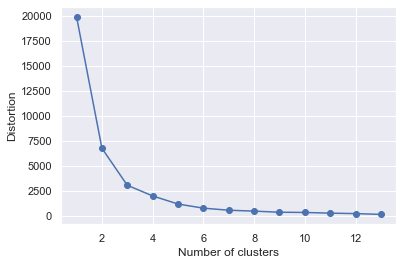

In [37]:
X = df_cus[['recency']]

inertiaList = []
for i in range(1, 14):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    inertiaList.append(km.inertia_)

# plot
plt.plot(range(1, 14), inertiaList, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [26]:
df_cus.groupby('recency_cluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
recency_cluster,,,,,,,,
0,226.0,6.203540,1.821644,4.0,5.00,6.0,7.0,10.0
1,493.0,1.008114,1.037868,0.0,0.00,1.0,2.0,3.0
2,10.0,26.200000,3.675746,21.0,22.75,27.0,28.5,32.0
3,72.0,14.236111,2.729562,11.0,12.00,14.0,16.0,20.0


In [38]:
df_cus.groupby('recency_cluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
recency_cluster,,,,,,,,
0,493.0,1.008114,1.037868,0.0,0.0,1.0,2.0,3.0
1,77.0,13.207792,2.477996,10.0,11.0,13.0,15.0,18.0
2,215.0,6.009302,1.646267,4.0,4.0,6.0,7.0,9.0
3,16.0,23.750000,4.343578,19.0,20.0,22.0,27.0,32.0


In [39]:
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final


In [27]:
df_cus = order_cluster('recency_cluster', 'recency',df_cus,False)
df_cus.groupby('recency_cluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
recency_cluster,,,,,,,,
0,10.0,26.200000,3.675746,21.0,22.75,27.0,28.5,32.0
1,72.0,14.236111,2.729562,11.0,12.00,14.0,16.0,20.0
2,226.0,6.203540,1.821644,4.0,5.00,6.0,7.0,10.0
3,493.0,1.008114,1.037868,0.0,0.00,1.0,2.0,3.0


In [40]:
df_cus = order_cluster('recency_cluster', 'recency',df_cus,False)
df_cus.groupby('recency_cluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
recency_cluster,,,,,,,,
0,16.0,23.750000,4.343578,19.0,20.0,22.0,27.0,32.0
1,77.0,13.207792,2.477996,10.0,11.0,13.0,15.0,18.0
2,215.0,6.009302,1.646267,4.0,4.0,6.0,7.0,9.0
3,493.0,1.008114,1.037868,0.0,0.0,1.0,2.0,3.0


In [41]:
df_cus

,household_key,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,revenue,recency,frequency,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted,recency_cluster
0,1,1,1,4.0,2.0,2.0,0.0,3.0,80.0,3.0,0.75,0.04,3362.46,5,67,2158.21,158.50,206.80,0.00,374.38,43.64,12.69,17.91,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,16,1,0,2.0,1.0,1.0,0.0,0.0,32.0,0.0,0.00,0.00,1471.45,4,92,785.67,97.87,86.97,192.30,68.29,8.86,6.43,95.79,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,25,1,0,3.0,3.0,0.0,0.0,0.0,48.0,0.0,0.00,0.00,2739.20,6,76,1271.37,37.72,103.08,35.00,921.90,1.00,10.29,110.97,35-44,U,50-74K,Unknown,Unknown,1,None/Unknown,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,49,1,0,3.0,1.0,2.0,0.0,0.0,42.0,0.0,0.00,0.00,4985.23,4,89,2599.58,224.33,241.64,844.86,493.36,11.36,0.00,331.90,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,52,1,0,5.0,3.0,2.0,0.0,0.0,75.0,0.0,0.00,0.00,4245.68,6,114,2294.65,234.78,356.83,339.59,421.51,25.24,20.04,171.01,45-54,B,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,1396,1,1,2.0,2.0,0.0,0.0,1.0,32.0,1.0,0.50,0.03,7003.24,32,225,3628.96,531.89,501.34,524.21,221.62,8.37,4.48,796.26,65+,A,125-149K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
797,1676,1,0,3.0,2.0,1.0,0.0,0.0,65.0,0.0,0.00,0.00,3508.69,19,74,1697.69,73.05,487.71,181.89,152.91,508.47,0.00,0.00,35-44,U,75-99K,Unknown,2 Adults No Kids,2,None/Unknown,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
798,1949,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1117.44,27,38,572.75,57.12,78.14,0.00,82.70,12.99,4.59,182.15,45-54,U,Under 15K,Unknown,Single Female,1,None/Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
799,2092,1,0,2.0,2.0,0.0,0.0,0.0,32.0,0.0,0.00,0.00,2290.54,27,122,1107.55,47.03,64.54,408.07,330.24,0.00,4.64,120.49,35-44,A,Under 15K,Homeowner,1 Adult Kids,3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
#clustering for Frequency

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_cus[['frequency']])
df_cus['frequency_cluster'] = kmeans.predict(df_cus[['frequency']])
df_cus

,household_key,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,revenue,recency,frequency,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted,recency_cluster,frequency_cluster
0,1,1,1,4.0,2.0,2.0,0.0,3.0,80.0,3.0,0.75,0.04,3362.46,5,67,2158.21,158.50,206.80,0.00,374.38,43.64,12.69,17.91,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
1,16,1,0,2.0,1.0,1.0,0.0,0.0,32.0,0.0,0.00,0.00,1471.45,4,92,785.67,97.87,86.97,192.30,68.29,8.86,6.43,95.79,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
2,25,1,0,3.0,3.0,0.0,0.0,0.0,48.0,0.0,0.00,0.00,2739.20,6,76,1271.37,37.72,103.08,35.00,921.90,1.00,10.29,110.97,35-44,U,50-74K,Unknown,Unknown,1,None/Unknown,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
3,49,1,0,3.0,1.0,2.0,0.0,0.0,42.0,0.0,0.00,0.00,4985.23,4,89,2599.58,224.33,241.64,844.86,493.36,11.36,0.00,331.90,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
4,52,1,0,5.0,3.0,2.0,0.0,0.0,75.0,0.0,0.00,0.00,4245.68,6,114,2294.65,234.78,356.83,339.59,421.51,25.24,20.04,171.01,45-54,B,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,1396,1,1,2.0,2.0,0.0,0.0,1.0,32.0,1.0,0.50,0.03,7003.24,32,225,3628.96,531.89,501.34,524.21,221.62,8.37,4.48,796.26,65+,A,125-149K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
797,1676,1,0,3.0,2.0,1.0,0.0,0.0,65.0,0.0,0.00,0.00,3508.69,19,74,1697.69,73.05,487.71,181.89,152.91,508.47,0.00,0.00,35-44,U,75-99K,Unknown,2 Adults No Kids,2,None/Unknown,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
798,1949,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1117.44,27,38,572.75,57.12,78.14,0.00,82.70,12.99,4.59,182.15,45-54,U,Under 15K,Unknown,Single Female,1,None/Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
799,2092,1,0,2.0,2.0,0.0,0.0,0.0,32.0,0.0,0.00,0.00,2290.54,27,122,1107.55,47.03,64.54,408.07,330.24,0.00,4.64,120.49,35-44,A,Under 15K,Homeowner,1 Adult Kids,3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
df_cus = order_cluster('frequency_cluster', 'frequency',df_cus,True)
df_cus.groupby('frequency_cluster')['frequency'].describe()


,count,mean,std,min,25%,50%,75%,max
frequency_cluster,,,,,,,,
0,454.0,80.343612,25.252910,20.0,61.25,81.0,101.00,123.0
1,247.0,166.271255,30.811967,124.0,139.00,162.0,190.00,235.0
2,88.0,304.250000,61.118549,236.0,259.50,284.5,328.75,500.0
3,12.0,722.583333,195.656684,538.0,601.00,626.5,777.50,1159.0


In [44]:
#clustering for Revenue

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_cus[['revenue']])
df_cus['revenue_cluster'] = kmeans.predict(df_cus[['revenue']])
df_cus

,household_key,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,revenue,recency,frequency,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted,recency_cluster,frequency_cluster,revenue_cluster
0,1,1,1,4.0,2.0,2.0,0.0,3.0,80.0,3.0,0.75,0.04,3362.46,5,67,2158.21,158.50,206.80,0.00,374.38,43.64,12.69,17.91,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
1,16,1,0,2.0,1.0,1.0,0.0,0.0,32.0,0.0,0.00,0.00,1471.45,4,92,785.67,97.87,86.97,192.30,68.29,8.86,6.43,95.79,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
2,25,1,0,3.0,3.0,0.0,0.0,0.0,48.0,0.0,0.00,0.00,2739.20,6,76,1271.37,37.72,103.08,35.00,921.90,1.00,10.29,110.97,35-44,U,50-74K,Unknown,Unknown,1,None/Unknown,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
3,49,1,0,3.0,1.0,2.0,0.0,0.0,42.0,0.0,0.00,0.00,4985.23,4,89,2599.58,224.33,241.64,844.86,493.36,11.36,0.00,331.90,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2
4,52,1,0,5.0,3.0,2.0,0.0,0.0,75.0,0.0,0.00,0.00,4245.68,6,114,2294.65,234.78,356.83,339.59,421.51,25.24,20.04,171.01,45-54,B,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,1467,1,0,1.0,1.0,0.0,0.0,0.0,16.0,0.0,0.00,0.00,1960.58,1,629,1126.23,102.20,26.14,140.00,292.13,0.00,67.93,86.07,35-44,A,50-74K,Probable Owner,2 Adults Kids,4,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0
797,1479,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,6808.87,0,586,2706.75,64.92,145.82,297.29,3111.99,0.00,3.51,62.40,45-54,U,15-24K,Probable Renter,Unknown,1,None/Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,2
798,1707,1,1,4.0,3.0,1.0,0.0,1.0,61.0,1.0,0.25,0.02,5544.42,0,624,2984.41,171.16,104.82,0.00,1703.21,29.62,10.11,97.53,35-44,B,25-34K,Unknown,Single Female,1,None/Unknown,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,2
799,1795,1,1,5.0,2.0,3.0,0.0,13.0,97.0,13.0,2.60,0.13,7866.28,0,905,4876.20,244.98,359.34,290.61,1021.85,126.50,0.00,289.94,45-54,U,25-34K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3


In [45]:
df_cus = order_cluster('revenue_cluster', 'revenue',df_cus,True)
df_cus.groupby('revenue_cluster')['revenue'].describe()


,count,mean,std,min,25%,50%,75%,max
revenue_cluster,,,,,,,,
0,420.0,2360.988214,828.993125,474.06,1810.580,2312.350,3037.2025,3798.90
1,263.0,5221.469392,970.541074,3810.00,4344.835,5123.790,5987.1150,7264.41
2,100.0,9370.840000,1370.541936,7376.23,8158.060,9330.655,10331.7275,12025.70
3,18.0,15266.292778,2617.835567,12708.20,13427.550,14629.435,16128.4100,22745.40


In [46]:
df_cus['rfm_score'] = df_cus.recency_cluster + df_cus.frequency_cluster + df_cus.revenue_cluster

df_cus['segment'] = 'Low-value'
df_cus.loc[df_cus.rfm_score > 3,'segment'] = 'Mid-value'
df_cus.loc[df_cus.rfm_score > 6,'segment'] = 'High-value'
# df_cus.loc[df_cus.rfm_score > 8,'segment'] = 'Champion'
# df_cus['cannot_lose'] = 0
# df_cus.loc[(df_cus.frequency_cluster==3) & (df_cus.revenue_cluster==3),'cannot_lose'] = 1
df_cus

,household_key,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,revenue,recency,frequency,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted,recency_cluster,frequency_cluster,revenue_cluster,rfm_score,segment
0,1,1,1,4.0,2.0,2.0,0.0,3.0,80.0,3.0,0.75,0.04,3362.46,5,67,2158.21,158.50,206.80,0.00,374.38,43.64,12.69,17.91,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,Low-value
1,16,1,0,2.0,1.0,1.0,0.0,0.0,32.0,0.0,0.00,0.00,1471.45,4,92,785.67,97.87,86.97,192.30,68.29,8.86,6.43,95.79,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,Low-value
2,25,1,0,3.0,3.0,0.0,0.0,0.0,48.0,0.0,0.00,0.00,2739.20,6,76,1271.37,37.72,103.08,35.00,921.90,1.00,10.29,110.97,35-44,U,50-74K,Unknown,Unknown,1,None/Unknown,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,Low-value
3,71,1,0,1.0,1.0,0.0,0.0,0.0,16.0,0.0,0.00,0.00,2991.04,6,76,805.14,23.20,128.71,30.00,1568.06,1.00,26.72,182.04,35-44,A,25-34K,Homeowner,Single Female,2,None/Unknown,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,Low-value
4,74,1,0,4.0,2.0,2.0,0.0,0.0,53.0,0.0,0.00,0.00,1915.48,7,123,1031.91,10.76,205.54,0.00,258.96,6.37,43.26,169.70,65+,A,15-24K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,Low-value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,2322,1,1,7.0,2.0,4.0,1.0,3.0,90.0,3.0,0.43,0.03,20222.99,3,265,6619.57,802.70,2584.54,66.70,4532.86,668.17,19.74,820.90,45-54,U,175-199K,Homeowner,Single Male,1,None/Unknown,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,3,2,3,8,High-value
797,2351,1,1,6.0,2.0,3.0,1.0,7.0,119.0,7.0,1.17,0.06,12920.20,2,265,6043.77,465.22,1219.36,2161.37,980.03,60.01,0.00,719.77,45-54,A,75-99K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,3,2,3,8,High-value
798,718,1,1,10.0,3.0,5.0,2.0,4.0,179.0,4.0,0.40,0.02,16518.81,0,538,8563.79,387.36,1067.03,995.00,1875.42,327.80,10.85,782.03,45-54,A,25-34K,Homeowner,2 Adults Kids,5+,3+,1,1,0,1,1,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,3,3,3,9,High-value
799,900,1,0,5.0,2.0,3.0,0.0,0.0,64.0,0.0,0.00,0.00,13185.08,0,994,4550.80,816.53,487.56,2431.82,2680.25,54.75,119.87,568.30,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,9,High-value


In [47]:
df_cus_segnment = df_cus[['household_key','recency','revenue','frequency','segment']]
df_cus_segnment

,household_key,recency,revenue,frequency,segment
0,1,5,3362.46,67,Low-value
1,16,4,1471.45,92,Low-value
2,25,6,2739.20,76,Low-value
3,71,6,2991.04,76,Low-value
4,74,7,1915.48,123,Low-value
...,...,...,...,...,...
796,2322,3,20222.99,265,High-value
797,2351,2,12920.20,265,High-value
798,718,0,16518.81,538,High-value
799,900,0,13185.08,994,High-value


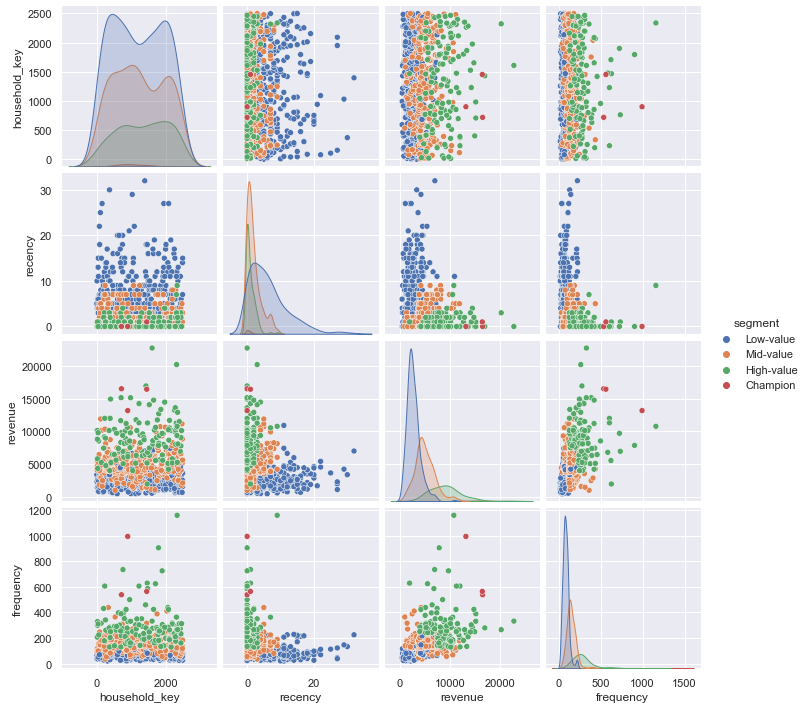

In [468]:
sns.pairplot(data=df_cus_segnment,hue='segment')

In [413]:
df_cus.groupby('segment').household_key.count()

segment
Champion        3
High-value    130
Low-value     406
Mid-value     262
Name: household_key, dtype: int64

In [48]:
df_cus.to_csv('retail_data2/household_cluster.csv',index=False)

### MODELING

In [449]:
# get all numerical columns
numerical_dtypes = ['int16','int32', 'int64','float16','float32','float64']
num_cols = []
for i in df_household_demo.columns:
    if df_household_demo[i].dtype in numerical_dtypes:
        num_cols.append(i)
        
print(len(num_cols))
print(num_cols)

cat_cols = df_household_demo.columns.difference(num_cols)
print(len(cat_cols))
print(cat_cols)

53
['household_key', 'received_campaign', 'redeemed_coupons', 'total_campaigns_received', 'TypeA', 'TypeB', 'TypeC', 'total_campaigns_engaged', 'total_coupons_received', 'total_coupons_redeemed', 'camp_conversion_rate', 'coupon_conversion_rate', 'revenue', 'recency', 'frequency', 'GROCERY_spend', 'DELI_spend', 'PRODUCE_spend', 'KIOSK-GAS_spend', 'DRUG GM_spend', 'NUTRITION_spend', 'SALAD BAR_spend', 'MEAT_spend', 'campA_26_converted', 'campA_30_converted', 'campA_8_converted', 'campA_13_converted', 'campA_18_converted', 'campB_28_converted', 'campB_29_converted', 'campB_1_converted', 'campB_2_converted', 'campB_4_converted', 'campB_5_converted', 'campB_7_converted', 'campB_9_converted', 'campB_10_converted', 'campB_12_converted', 'campB_11_converted', 'campB_16_converted', 'campB_17_converted', 'campB_19_converted', 'campB_22_converted', 'campB_21_converted', 'campB_23_converted', 'campB_25_converted', 'campB_24_converted', 'campC_27_converted', 'campC_3_converted', 'campC_6_converted'

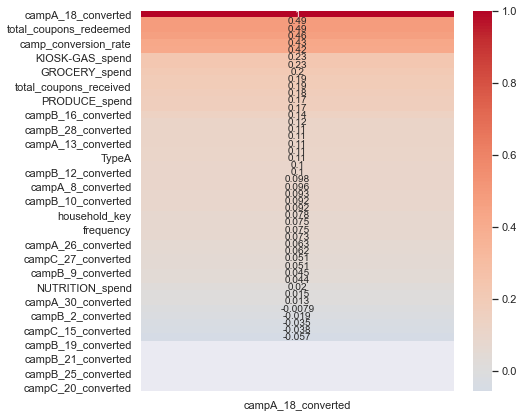

In [450]:
figure = plt.figure(figsize=(7,7))
sns.heatmap(df_household_demo.corr()[['campA_18_converted']].sort_values('campA_18_converted',ascending=False),annot=True, cmap='coolwarm', center=0);


In [451]:
df_household_demo_encoded = pd.get_dummies(data = df_household_demo, columns = cat_cols)
df_household_demo_encoded.head()

,household_key,received_campaign,redeemed_coupons,total_campaigns_received,TypeA,TypeB,TypeC,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,revenue,recency,frequency,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted,age_desc_19-24,age_desc_25-34,age_desc_35-44,age_desc_45-54,age_desc_55-64,age_desc_65+,hh_comp_desc_1 Adult Kids,hh_comp_desc_2 Adults Kids,hh_comp_desc_2 Adults No Kids,hh_comp_desc_Single Female,hh_comp_desc_Single Male,hh_comp_desc_Unknown,homeowner_desc_Homeowner,homeowner_desc_Probable Owner,homeowner_desc_Probable Renter,homeowner_desc_Renter,homeowner_desc_Unknown,household_size_desc_1,household_size_desc_2,household_size_desc_3,household_size_desc_4,household_size_desc_5+,income_desc_100-124K,income_desc_125-149K,income_desc_15-24K,income_desc_150-174K,income_desc_175-199K,income_desc_200-249K,income_desc_25-34K,income_desc_250K+,income_desc_35-49K,income_desc_50-74K,income_desc_75-99K,income_desc_Under 15K,kid_category_desc_1,kid_category_desc_2,kid_category_desc_3+,kid_category_desc_None/Unknown,marital_status_code_A,marital_status_code_B,marital_status_code_U
0,1,1,1,4.0,2.0,2.0,0.0,3.0,80.0,3.0,0.75,0.04,3362.46,5,67,2158.21,158.50,206.80,0.00,374.38,43.64,12.69,17.91,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
1,7,1,0,3.0,0.0,3.0,0.0,0.0,45.0,0.0,0.00,0.00,2320.50,10,38,1184.37,116.15,168.34,0.00,497.99,4.98,0.00,175.52,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
2,8,1,1,8.0,2.0,6.0,0.0,1.0,136.0,1.0,0.12,0.01,4113.90,0,90,2208.33,45.47,183.04,188.94,688.08,11.98,50.55,261.88,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,13,1,1,6.0,2.0,4.0,0.0,11.0,82.0,11.0,1.83,0.13,10138.40,0,207,3692.39,47.65,232.49,2472.86,2187.85,3.31,10.09,19.13,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,16,1,0,2.0,1.0,1.0,0.0,0.0,32.0,0.0,0.00,0.00,1471.45,4,92,785.67,97.87,86.97,192.30,68.29,8.86,6.43,95.79,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [452]:
df_household_demo_encoded.columns

Index(['household_key', 'received_campaign', 'redeemed_coupons', 'total_campaigns_received', 'TypeA', 'TypeB', 'TypeC', 'total_campaigns_engaged', 'total_coupons_received', 'total_coupons_redeemed', 'camp_conversion_rate', 'coupon_conversion_rate', 'revenue', 'recency', 'frequency', 'GROCERY_spend', 'DELI_spend', 'PRODUCE_spend', 'KIOSK-GAS_spend', 'DRUG GM_spend', 'NUTRITION_spend', 'SALAD BAR_spend', 'MEAT_spend', 'campA_26_converted', 'campA_30_converted', 'campA_8_converted', 'campA_13_converted', 'campA_18_converted', 'campB_28_converted', 'campB_29_converted', 'campB_1_converted', 'campB_2_converted', 'campB_4_converted', 'campB_5_converted', 'campB_7_converted', 'campB_9_converted', 'campB_10_converted', 'campB_12_converted', 'campB_11_converted', 'campB_16_converted', 'campB_17_converted', 'campB_19_converted', 'campB_22_converted', 'campB_21_converted', 'campB_23_converted', 'campB_25_converted', 'campB_24_converted', 'campC_27_converted', 'campC_3_converted',
       'campC_6_

In [453]:
# not_included = ['campA_18_converted','total_campaigns_received','TypeA','TypeB','TypeC','household_key','received_campaign','redeemed_coupons','total_campaigns_engaged','total_coupons_received','total_coupons_redeemed','camp_conversion_rate','coupon_conversion_rate','camp_converted']

# cols = [c for c in df_household_demo_encoded.columns if c not in (not_included)]

cols = ['age_desc_19-24',
 'age_desc_25-34',
 'age_desc_35-44',
 'age_desc_45-54',
 'age_desc_55-64',
 'age_desc_65+',
 'hh_comp_desc_1 Adult Kids',
 'hh_comp_desc_2 Adults Kids',
 'hh_comp_desc_2 Adults No Kids',
 'hh_comp_desc_Single Female',
 'hh_comp_desc_Single Male',
 'hh_comp_desc_Unknown',
#  'homeowner_desc_Homeowner',
#  'homeowner_desc_Probable Owner',
#  'homeowner_desc_Probable Renter',
#  'homeowner_desc_Renter',
#  'homeowner_desc_Unknown',
 'household_size_desc_1',
 'household_size_desc_2',
 'household_size_desc_3',
 'household_size_desc_4',
 'household_size_desc_5+',
 'income_desc_100-124K',
 'income_desc_125-149K',
 'income_desc_15-24K',
 'income_desc_150-174K',
 'income_desc_175-199K',
 'income_desc_200-249K',
 'income_desc_25-34K',
 'income_desc_250K+',
 'income_desc_35-49K',
 'income_desc_50-74K',
 'income_desc_75-99K',
 'income_desc_Under 15K',
 'kid_category_desc_1',
 'kid_category_desc_2',
 'kid_category_desc_3+',
 'kid_category_desc_None/Unknown',
 'marital_status_code_A',
 'marital_status_code_B',
 'marital_status_code_U']

# cols=['recency', 'frequency']

X = pd.DataFrame(df_household_demo_encoded, columns = cols)
y = df_household_demo_encoded['campA_18_converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
cols
# X_train.head()

['age_desc_19-24',
 'age_desc_25-34',
 'age_desc_35-44',
 'age_desc_45-54',
 'age_desc_55-64',
 'age_desc_65+',
 'hh_comp_desc_1 Adult Kids',
 'hh_comp_desc_2 Adults Kids',
 'hh_comp_desc_2 Adults No Kids',
 'hh_comp_desc_Single Female',
 'hh_comp_desc_Single Male',
 'hh_comp_desc_Unknown',
 'household_size_desc_1',
 'household_size_desc_2',
 'household_size_desc_3',
 'household_size_desc_4',
 'household_size_desc_5+',
 'income_desc_100-124K',
 'income_desc_125-149K',
 'income_desc_15-24K',
 'income_desc_150-174K',
 'income_desc_175-199K',
 'income_desc_200-249K',
 'income_desc_25-34K',
 'income_desc_250K+',
 'income_desc_35-49K',
 'income_desc_50-74K',
 'income_desc_75-99K',
 'income_desc_Under 15K',
 'kid_category_desc_1',
 'kid_category_desc_2',
 'kid_category_desc_3+',
 'kid_category_desc_None/Unknown',
 'marital_status_code_A',
 'marital_status_code_B',
 'marital_status_code_U']

In [454]:
from imblearn.over_sampling import SMOTE
from collections import Counter

#Oversampling the data
smote = SMOTE(random_state = 101)
X_sm, y_sm = smote.fit_resample(X, y)
Counter(y_sm)

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,test_size=0.2,random_state=42)


In [202]:
X_train.head()

,age_desc_19-24,age_desc_25-34,age_desc_35-44,age_desc_45-54,age_desc_55-64,age_desc_65+,hh_comp_desc_1 Adult Kids,hh_comp_desc_2 Adults Kids,hh_comp_desc_2 Adults No Kids,hh_comp_desc_Single Female,hh_comp_desc_Single Male,hh_comp_desc_Unknown,homeowner_desc_Homeowner,homeowner_desc_Probable Owner,homeowner_desc_Probable Renter,homeowner_desc_Renter,homeowner_desc_Unknown,household_size_desc_1,household_size_desc_2,household_size_desc_3,household_size_desc_4,household_size_desc_5+,income_desc_100-124K,income_desc_125-149K,income_desc_15-24K,income_desc_150-174K,income_desc_175-199K,income_desc_200-249K,income_desc_25-34K,income_desc_250K+,income_desc_35-49K,income_desc_50-74K,income_desc_75-99K,income_desc_Under 15K,kid_category_desc_1,kid_category_desc_2,kid_category_desc_3+,kid_category_desc_None/Unknown,marital_status_code_A,marital_status_code_B,marital_status_code_U,recency,frequency
616,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,2,57
329,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,162
342,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,138
394,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,165
79,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,2,111


In [201]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs,y,test_size=0.2,random_state=42)


In [180]:
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve

def plot_ROC_curve(model,X_test,y_test):

    # Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = model.predict_proba(X_test)[:,1]

    # Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = roc_curve(y_test, preds)

    # Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    roc_auc = auc(fpr, tpr)

    # Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

def display_scores(model, X_test, y_test, y_pred):
    
    # predict probabilities
    pred_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    pred_probs = pred_probs[:, 1]
    
    print('Accuracy is: ',round(accuracy_score(y_test, y_pred),2))
    print('F1 score is: ',round(f1_score(y_test, y_pred),2))
    print('Ave PR score: ',round(average_precision_score(y_test, pred_probs),2))

    cm = confusion_matrix(y_test,y_pred)
    
    sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
#     print(classification_report(y_test,y_pred,target_names=('Stay','Leave')))
    print(classification_report(y_test,y_pred))
    
    plot_precision_recall_curve(model, X_test, y_test)
    
    plot_ROC_curve(model,X_test,y_test)

Accuracy is:  0.84
F1 score is:  0.81
Ave PR score:  0.91
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       140
           1       0.89      0.74      0.81       114

    accuracy                           0.84       254
   macro avg       0.85      0.83      0.84       254
weighted avg       0.85      0.84      0.84       254



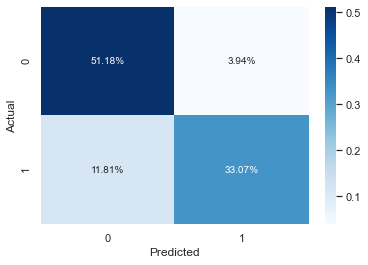

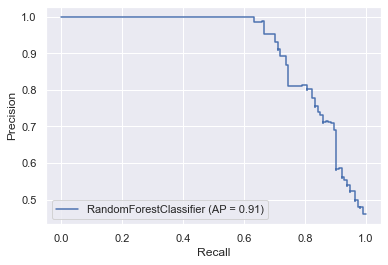

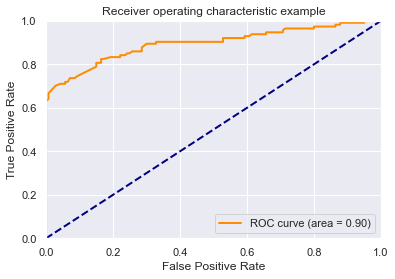

In [455]:
RF_clf = RandomForestClassifier(max_depth=25,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         n_estimators=1200)
    
RF_clf.fit(X_train_sm,y_train_sm)
y_pred_sm = RF_clf.predict(X_test_sm)
display_scores(RF_clf, X_test_sm, y_test_sm, y_pred_sm)


                          feature     score
33          marital_status_code_A  0.094050
26             income_desc_50-74K  0.083301
3                  age_desc_45-54  0.068330
25             income_desc_35-49K  0.067562
2                  age_desc_35-44  0.051056
8   hh_comp_desc_2 Adults No Kids  0.049520
27             income_desc_75-99K  0.047601
1                  age_desc_25-34  0.046065
28          income_desc_Under 15K  0.042610
9      hh_comp_desc_Single Female  0.041459


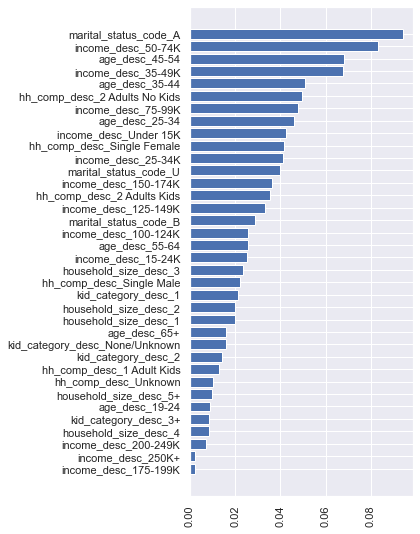

In [381]:
per_imp = permutation_importance(RF_clf, X_train_sm,y_train_sm, scoring='recall')
importances = per_imp.importances_mean
    
imp_dict = dict(zip(X.columns, importances))
score_df = pd.DataFrame(imp_dict.items(), columns=['feature', 'score'])
score_df = score_df.sort_values('score',ascending=False)
print(score_df.head(10))

# plot the scores
fig = plt.figure(figsize=(4,9))
score_df = score_df.sort_values('score',ascending=True)
plt.barh(score_df.feature, score_df.score)
plt.xticks(rotation=90)
plt.show()


Accuracy is:  0.78
F1 score is:  0.14
Ave PR score:  0.24
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       130
           1       0.27      0.10      0.14        31

    accuracy                           0.78       161
   macro avg       0.54      0.52      0.51       161
weighted avg       0.71      0.78      0.73       161



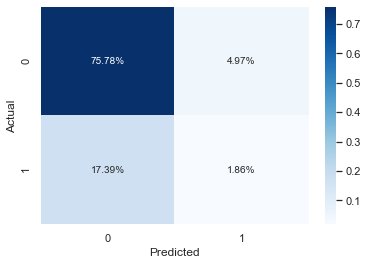

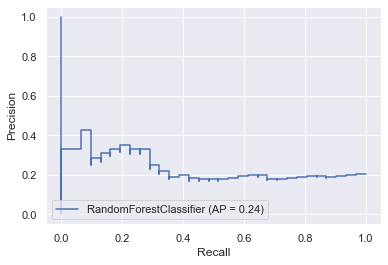

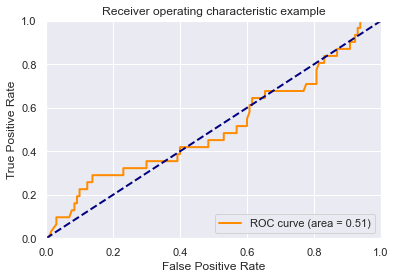

In [220]:

RF_clf = RandomForestClassifier(max_depth=25,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         n_estimators=1200)
    
RF_clf.fit(X_train,y_train)
y_pred = RF_clf.predict(X_test)
display_scores(RF_clf, X_test, y_test, y_pred)


                       feature     score
38       marital_status_code_A  0.151111
3               age_desc_45-54  0.137778
16      homeowner_desc_Unknown  0.124444
31          income_desc_50-74K  0.108148
40       marital_status_code_U  0.093333
32          income_desc_75-99K  0.091852
2               age_desc_35-44  0.084444
30          income_desc_35-49K  0.072593
1               age_desc_25-34  0.068148
7   hh_comp_desc_2 Adults Kids  0.062222


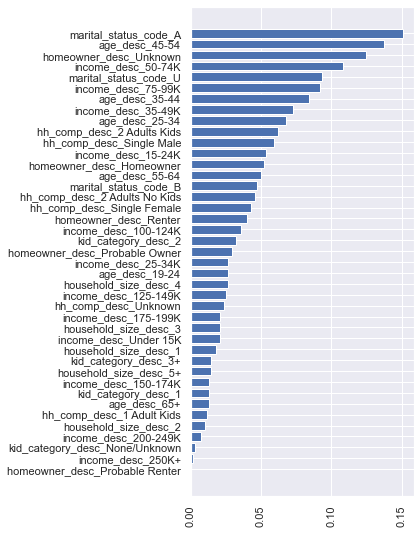

In [221]:
per_imp = permutation_importance(RF_clf, X_train,y_train, scoring='recall')
importances = per_imp.importances_mean
    
imp_dict = dict(zip(X.columns, importances))
score_df = pd.DataFrame(imp_dict.items(), columns=['feature', 'score'])
score_df = score_df.sort_values('score',ascending=False)
print(score_df.head(10))

# plot the scores
fig = plt.figure(figsize=(4,9))
score_df = score_df.sort_values('score',ascending=True)
plt.barh(score_df.feature, score_df.score)
plt.xticks(rotation=90)
plt.show()


In [330]:
df_trans_full.store_id.nunique()

582

In [323]:
df_cus_redeemed_camp18.store_id.unique()

array([  286, 31862,   297, 33923,   362,   367, 31742,   408,   442,
         316,   323,   429,   327,   388,   396,   361,   311,   406,
         381,   450,   292,   401,   382,   375,   289,   300,   436,
         439,   404, 31582,   356,   363,   321,   310,   421,   370,
         306,   320,   415,   365,   389,   304,   380,   438,   402,
         324,  3235,   334, 34011,   432,   447,   319, 31401,   422,
         338,   433,   318,   343,   296, 31642,   309,   412,   448,
         384,   410,   335,   333, 34007,   369,   322,   317,   441,
         372,   358,   368,   391,   346,   364,   330,   424,   403,
         400,   366, 31762, 31782,   337,   445,   339,   420,   427,
       32004,   293,   359,   443,   673,   295, 34280,   345,   299,
         313,   622,   715,  3327,   315,   329,  2761,   446,   669,
         340,   352,  2998,  3236,   355,  3479,  3131,  3517,   379,
        2950,  3060,  3179])

In [341]:
product_id_camp18 = df_cus_redeemed_camp18.product_id.unique()
product_id_camp18.shape

(14825,)

In [336]:
df_causal_camp18 = df_prod_causal[(df_prod_causal.product_id.isin(product_id_camp18)) & (df_prod_causal.week_no>=587/7) & (df_prod_causal.week_no <= 642/7)]


In [338]:
df_causal_camp18.query('product_id==28966')

,product_id,store_id,week_no,display,mailer
97670,28966,296,90,6,0
97852,28966,330,84,6,0
97853,28966,330,85,6,0
98056,28966,367,84,7,0
98057,28966,367,85,A,0
98058,28966,367,86,4,0
98059,28966,367,87,4,0
98060,28966,367,88,4,0
98061,28966,367,89,4,0
98062,28966,367,90,9,0


In [339]:
df_prod.query('product_id==28966')

,product_id,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product
93,28966,69,GROCERY,Private,EGGS,EGGS - MEDIUM,ABD 1 DZ


In [340]:
df_coupon.query('product_id==28966 & campaign==18')

,coupon_upc,product_id,campaign


In [353]:
df_causal_test = df_prod_causal[(df_prod_causal.week_no>=587/7) & (df_prod_causal.week_no <= 642/7)]


In [354]:
df_causal_test.mailer.unique()

array(['0', 'A', 'D', 'J', 'H', 'C', 'L', 'F', 'X', 'P', 'Z'],
      dtype=object)

In [365]:
df_causal_test[df_causal_test.mailer.isin(['J','P','X','Z'])].product_id.nunique()

prod_with_coupon = df_causal_test[df_causal_test.mailer.isin(['J','P'])].product_id.unique()

In [372]:
test_arr = set(product_id_camp18).intersection(set(prod_with_coupon))
len(test_arr)

150

In [374]:
len(prod_with_coupon)

472

In [376]:
df_causal_test[df_causal_test.product_id.isin(test_arr)].mailer.unique()

array(['P', '0', 'J', 'A', 'H', 'F', 'D', 'L', 'C'], dtype=object)